In [1]:
import os
os.chdir('..')

In [2]:
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, cycler
from src.utils.dataset import ms_data


In [3]:
intensities_file = 'data/canis_intensities.csv'
dataset_name = intensities_file.split('/')[-1].split('_')[0]
data, labels, samples = ms_data(intensities_file)
data[np.isnan(data)] = 0

indices = np.argsort(labels)
data = data[indices]
labels = [labels[ind] for ind in indices]
samples = [samples[ind] for ind in indices]

samples = [f"{label}_{sample}" for label, sample in zip(labels, samples)]
samples_set = sorted(list(set(samples)))

In [4]:
samples_set

['Fibrosarcoma_10',
 'Fibrosarcoma_2',
 'Fibrosarcoma_21',
 'Fibrosarcoma_23',
 'Fibrosarcoma_5',
 'Fibrosarcoma_6',
 'Fibrosarcoma_7',
 'GIST_24',
 'Hemangiopericytoma_17',
 'Hemangiopericytoma_3',
 'Histiocytic sarcoma_20',
 'Indifferenciated_11',
 'Indifferenciated_14',
 'Indifferenciated_22',
 'Indifferenciated_25',
 'Indifferenciated_9',
 'MPNST_4',
 'Myxosarcoma_1',
 'Normal_26',
 'Normal_27',
 'Normal_28',
 'Normal_29',
 'Normal_30',
 'Normal_31',
 'Normal_32',
 'Normal_33',
 'Osteosarcoma_13',
 'Osteosarcoma_15',
 'Osteosarcoma_16',
 'Osteosarcoma_18',
 'Osteosarcoma_8',
 'Rhabdomyosarcoma_12',
 'splenic sarcoma_19']

In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data, samples)

principal_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])
labels_df = pd.DataFrame(samples)
labels_df.index = principal_df.index
final_df = pd.DataFrame(np.concatenate((principal_df.values, labels_df.values), axis=1),
                        columns=list(principal_df.columns) + ['label'])

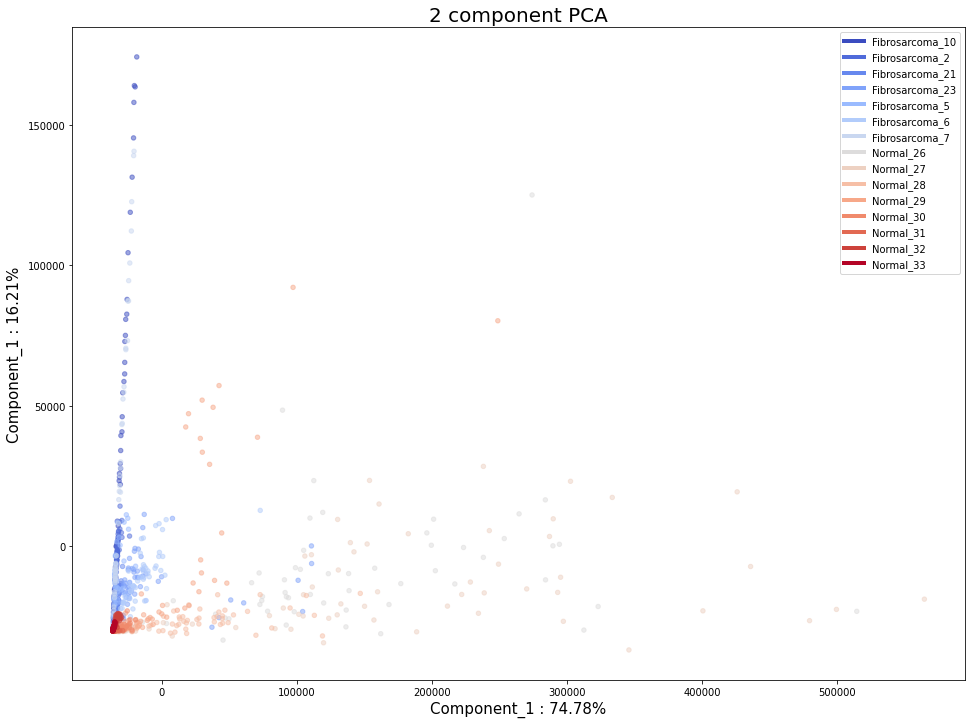

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ev = pca.explained_variance_ratio_
pc1 = 'Component_1 : ' + str(np.round(ev[0] * 100, decimals=2)) + "%"
pc2 = 'Component_1 : ' + str(np.round(ev[1] * 100, decimals=2)) + "%"
ax.set_xlabel(pc1, fontsize=15)
ax.set_ylabel(pc2, fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
cmap = plt.cm.coolwarm

num_targets = len(samples_set)

cols = cmap(np.linspace(0, 1, 15))
colors = rcParams['axes.prop_cycle'] = cycler(color=cols)
# colors = ["g", "b", "k", "r"]
colors_list = []
data1_list = []
data2_list = []

samples_to_keep = []
i = 0
for t, target in enumerate(samples_set):
    if 'Fibrosarcoma' in target or "Normal" in target:
        indices_to_keep = [True if x == target else False for x in
                           list(final_df.label)]  # 0 is the name of the column with target values
        data1 = list(final_df.loc[indices_to_keep, 'principal component 1'])
        data2 = list(final_df.loc[indices_to_keep, 'principal component 2'])
        try:
            assert np.sum(np.isnan(data1)) == 0 and np.sum(np.isnan(data2)) == 0
        except:
            print("Nans were detected. Please verify the DataFrame...")
            exit()
        data1_list += [data1]
        data2_list += [data2]
        colors_list += [np.array([[cols[i]] * len(data1)])]
        samples_to_keep += [target]
        i += 1


colors_vector = np.hstack(colors_list).squeeze()
data1_vector = np.hstack(data1_list).reshape(-1, 1)
data2_vector = np.hstack(data2_list).reshape(-1, 1)
data_colors_vector = np.concatenate((data1_vector, data2_vector, colors_vector), axis=1)
data1 = data_colors_vector[:, 0]
data2 = data_colors_vector[:, 1]
col = data_colors_vector[:, 2:]

ax.scatter(data1, data2, s=20, alpha=0.5, c=col, label=samples_to_keep)
custom_lines = [Line2D([0], [0], color=x[0][0], lw=4) for x in colors_list]

ax.legend(custom_lines, list(samples_to_keep))

plt.show()
plt.close()


In [7]:
colors_list[0][0][0]

array([0.2298057 , 0.29871797, 0.75368315, 1.        ])

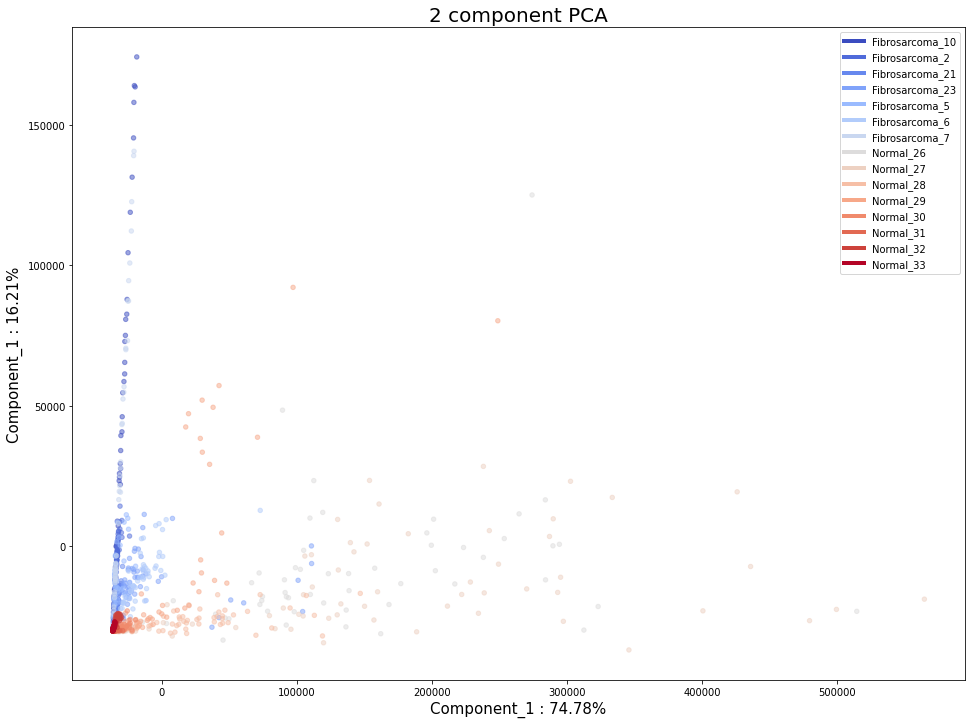

In [8]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ev = pca.explained_variance_ratio_
pc1 = 'Component_1 : ' + str(np.round(ev[0] * 100, decimals=2)) + "%"
pc2 = 'Component_1 : ' + str(np.round(ev[1] * 100, decimals=2)) + "%"
ax.set_xlabel(pc1, fontsize=15)
ax.set_ylabel(pc2, fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
cmap = plt.cm.coolwarm

num_targets = len(samples_set)

cols = cmap(np.linspace(0, 1, 15))
colors = rcParams['axes.prop_cycle'] = cycler(color=cols)
# colors = ["g", "b", "k", "r"]
colors_list = []
data1_list = []
data2_list = []

samples_to_keep = []
i = 0
for t, target in enumerate(samples_set):
    if 'Fibrosarcoma' in target or "Normal" in target:
        indices_to_keep = [True if x == target else False for x in
                           list(final_df.label)]  # 0 is the name of the column with target values
        data1 = list(final_df.loc[indices_to_keep, 'principal component 1'])
        data2 = list(final_df.loc[indices_to_keep, 'principal component 2'])
        try:
            assert np.sum(np.isnan(data1)) == 0 and np.sum(np.isnan(data2)) == 0
        except:
            print("Nans were detected. Please verify the DataFrame...")
            exit()
        data1_list += [data1]
        data2_list += [data2]
        colors_list += [np.array([[cols[i]] * len(data1)])]
        samples_to_keep += [target]
        i += 1


colors_vector = np.hstack(colors_list).squeeze()
data1_vector = np.hstack(data1_list).reshape(-1, 1)
data2_vector = np.hstack(data2_list).reshape(-1, 1)
data_colors_vector = np.concatenate((data1_vector, data2_vector, colors_vector), axis=1)
data1 = data_colors_vector[:, 0]
data2 = data_colors_vector[:, 1]
col = data_colors_vector[:, 2:]

ax.scatter(data1, data2, s=20, alpha=0.5, c=col, label=samples_to_keep)
custom_lines = [Line2D([0], [0], color=x[0][0], lw=4) for x in colors_list]

ax.legend(custom_lines, list(samples_to_keep))

plt.show()
plt.close()
